In [3]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns

In [6]:
Covid_Weekly_df = pd.read_excel('Resources/COVID_WEEKLY.xlsx')
Total_Doses_Administered_df = pd.read_excel('Resources\weekly_death_trends_and_total_doses_administered_per_week.xlsx')



In [7]:
#The first two combined data

Initial_combined_data_df = Covid_Weekly_df.merge(Total_Doses_Administered_df, on = ('Geography', 'Date'))

In [8]:
#The first two combined data
Initial_cleaned_combined_df =Initial_combined_data_df.fillna(0)
Initial_cleaned_combined_df.head()

,Geography,Date,Weekly Cases,Weekly Deaths,Weekly Administered Doses
0,United States,Feb 1 2023,280911,3452,343044.0
1,United States,Jan 25 2023,301243,3792,693850.0
2,United States,Jan 18 2023,316241,3691,948220.0
3,United States,Jan 11 2023,455641,4441,1273093.0
4,United States,Jan 4 2023,479479,2790,1126453.0


In [9]:
# Convert the date time to datetime64
Dates = pd.to_datetime(Initial_cleaned_combined_df['Date'])
#create new column 'Dates'
Initial_cleaned_combined_df['Dates'] = Dates
#sort the year and date
Initial_sorted_combined_df = Initial_cleaned_combined_df.sort_values(by = 'Dates').reset_index(drop =True)
Initial_sorted_combined_df.head()

,Geography,Date,Weekly Cases,Weekly Deaths,Weekly Administered Doses,Dates
0,United States,Jan 29 2020,6,0,0.0,2020-01-29
1,United States,Feb 5 2020,10,0,0.0,2020-02-05
2,United States,Feb 12 2020,10,0,0.0,2020-02-12
3,United States,Feb 19 2020,15,0,0.0,2020-02-19
4,United States,Feb 26 2020,24,0,0.0,2020-02-26


In [10]:
del Initial_sorted_combined_df['Date']
Initial_sorted_combined_df.head()

,Geography,Weekly Cases,Weekly Deaths,Weekly Administered Doses,Dates
0,United States,6,0,0.0,2020-01-29
1,United States,10,0,0.0,2020-02-05
2,United States,10,0,0.0,2020-02-12
3,United States,15,0,0.0,2020-02-19
4,United States,24,0,0.0,2020-02-26


In [11]:
#Reorganize the columns for the first two combined data frames
Data1_Final_sorted_df = Initial_sorted_combined_df[['Dates','Geography', 'Weekly Cases','Weekly Deaths', 'Weekly Administered Doses']]
Data1_Final_sorted_df.to_csv("output_data/Data1_Final_sorted_df.csv")
Data1_Final_sorted_df.head()

,Dates,Geography,Weekly Cases,Weekly Deaths,Weekly Administered Doses
0,2020-01-29,United States,6,0,0.0
1,2020-02-05,United States,10,0,0.0
2,2020-02-12,United States,10,0,0.0
3,2020-02-19,United States,15,0,0.0
4,2020-02-26,United States,24,0,0.0


In [12]:
#Let's begin plotting using object oriented method

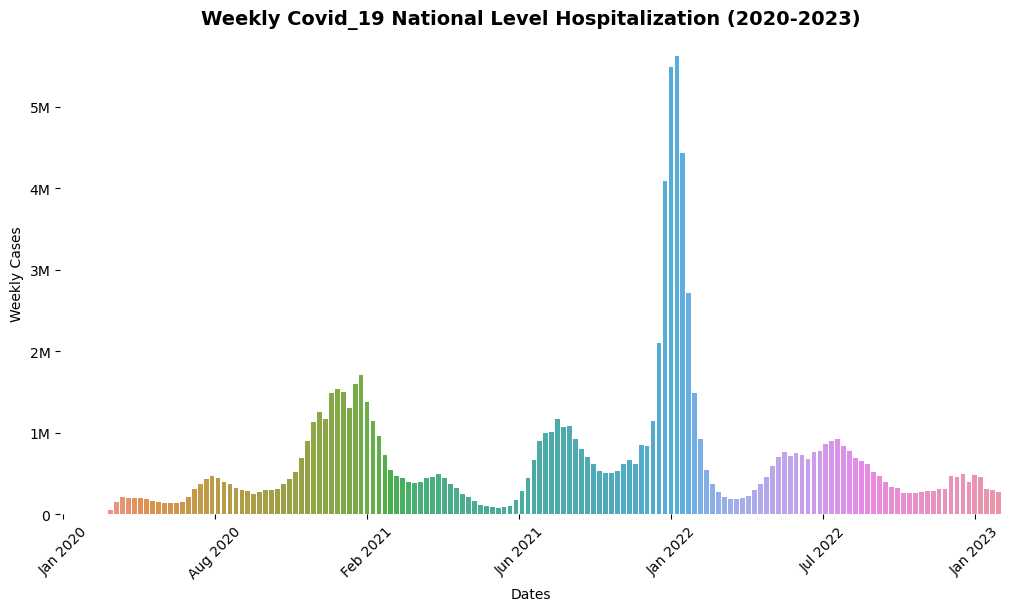

In [13]:
#Weekly Covid_19 National Level Hospitalization (2020-2023)

# Create a single dimension canvas for the plot 
fig, ax = plt.subplots(figsize= (10,6),layout='constrained')

# Using seaborn library to plot 
sns.barplot(x = 'Dates', y ='Weekly Cases', data = Data1_Final_sorted_df)
# Foramting both axes
ax.set_xticks(np.arange(0, 158, 25.5), ['Jan 2020', 'Aug 2020', 'Feb 2021','Jun 2021', 
                                        'Jan 2022','Jul 2022', 'Jan 2023'], rotation = 45)
ax.set_yticks(np.arange(0, 6000000, 1000000), ['0', '1M', '2M','3M', '4M','5M'])

ax.set_title('Weekly Covid_19 National Level Hospitalization (2020-2023)',fontweight='bold',fontsize=14);
#sns.set_style('whitegrid')
sns.despine(left=True, bottom = True)

plt.savefig("output_data/Fig1 Weekly Covid_19 National Level Hospitalization.png")


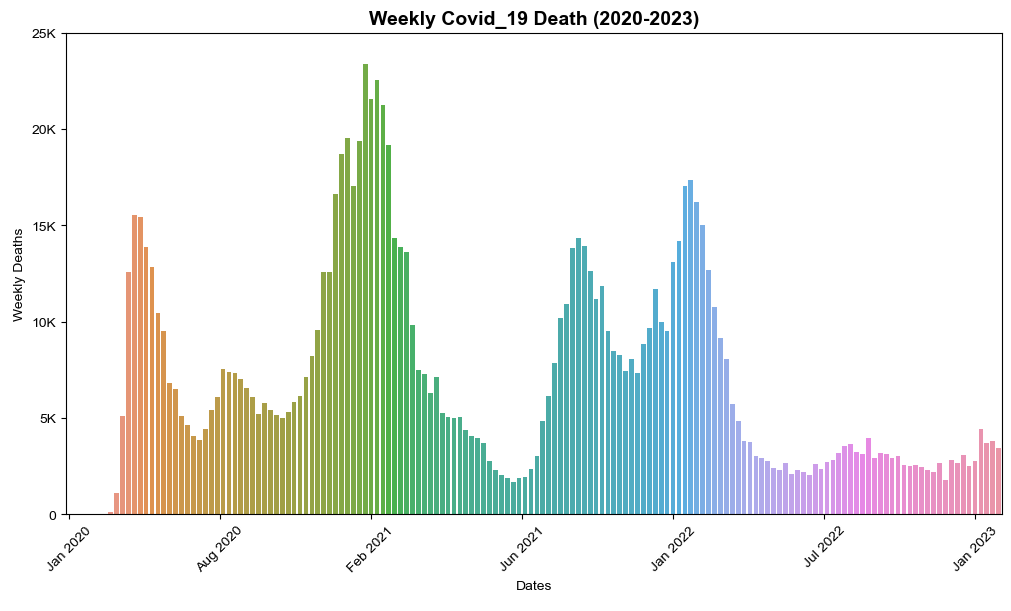

In [14]:
# Weekly Covid_19 Death (2020-2023)

# Create a single dimension canvas for the plot 
fig, ax = plt.subplots(figsize= (10,6),layout='constrained')
# Use seaborn library to plot 
sns.barplot(x = 'Dates', y ='Weekly Deaths', data = Data1_Final_sorted_df)
# Foramting both axes
ax.set_xticks(np.arange(0, 158, 25.5), ['Jan 2020', 'Aug 2020', 'Feb 2021','Jun 2021', 
                                        'Jan 2022','Jul 2022', 'Jan 2023'], rotation = 45)
ax.set_yticks(np.arange(0, 30000, 5000), ['0', '5K', '10K','15K', '20K','25K'])
ax.set_title('Weekly Covid_19 Death (2020-2023)',fontweight='bold',fontsize=14);
plt.savefig("output_data/Fig2 Weekly Covid_19 Deat.png")
sns.set_style('whitegrid')
#sns.despine(left=True, bottom = True)

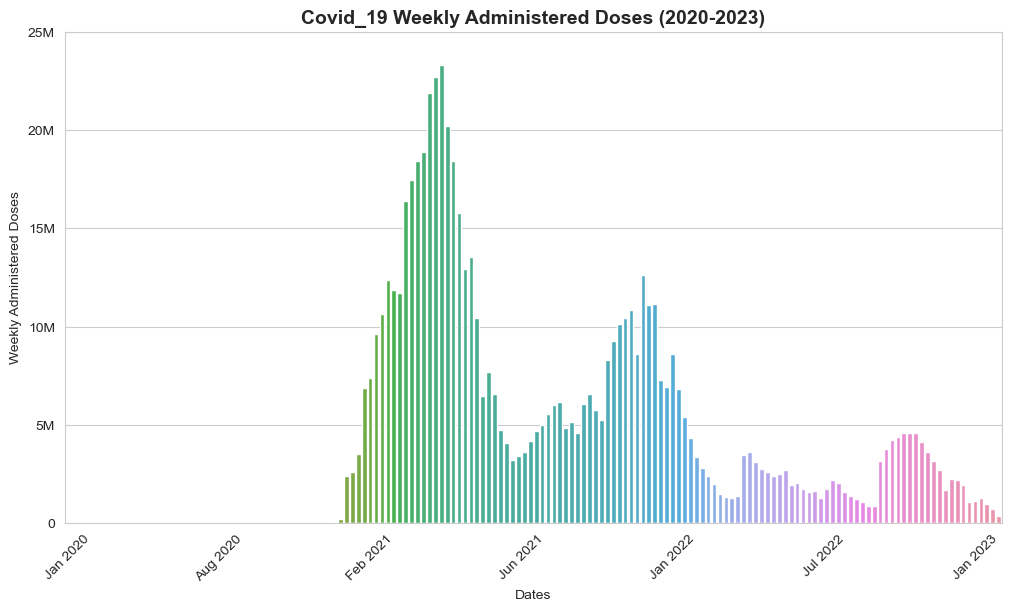

In [15]:
# Covid_19 Weekly Administered Doses (2020-2023)
sns.set
# Create a single dimension canvas for the plot 
fig, ax = plt.subplots(figsize= (10,6),layout='constrained')
# Use seaborn library to plot 
sns.barplot(x = 'Dates', y ='Weekly Administered Doses', data = Data1_Final_sorted_df)
# Foramting both axes
ax.set_xticks(np.arange(0, 158, 25.5), ['Jan 2020', 'Aug 2020', 'Feb 2021','Jun 2021', 
                                        'Jan 2022','Jul 2022', 'Jan 2023'], rotation = 45)
ax.set_yticks(np.arange(0, 30000000, 5000000), ['0', '5M', '10M','15M', '20M','25M'])

ax.set_title('Covid_19 Weekly Administered Doses (2020-2023)',fontweight='bold',fontsize=14);
plt.savefig("output_data/Fig3 Covid_19 Weekly Administered Doses.png")
sns.set_style('whitegrid')
#sns.despine(left=True, bottom = True)


In [25]:
#Linear Regression plots

def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 5)) + "x +" + str(round(intercept, 2))
    plt.scatter(x_values, y_values, marker="o")
    plt.plot(x_values, regression_values, "r-")
    print(f"The r-value is : {rvalue ** 2}")
    return line_eq

The r-value is : 0.2330617546864903


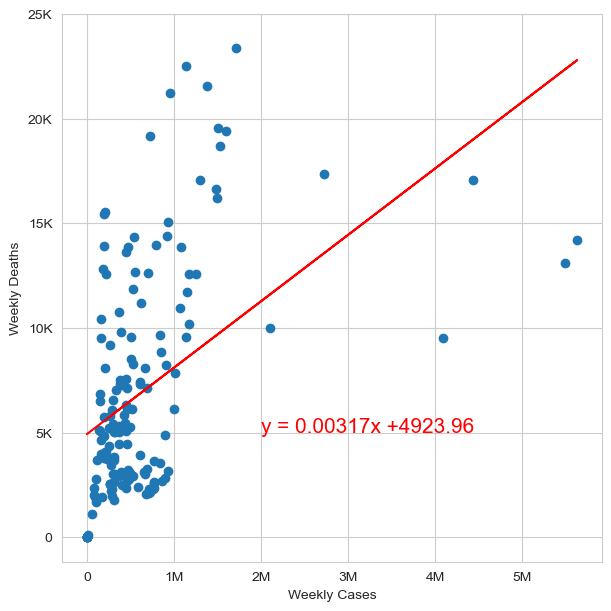

In [26]:
fig, ax = plt.subplots(figsize= (6,6),layout='constrained')
WeeklyCase_WeeklyDeath = linear_regression(Data1_Final_sorted_df['Weekly Cases'],Data1_Final_sorted_df['Weekly Deaths'] )
plt.annotate(WeeklyCase_WeeklyDeath, (2000000, 5000), fontsize=15, color="red")
ax.set_xticks(np.arange(0, 6000000, 1000000), ['0', '1M', '2M','3M', '4M','5M'])
ax.set_yticks(np.arange(0, 30000, 5000), ['0', '5K', '10K','15K', '20K','25K'])
plt.xlabel('Weekly Cases')
plt.ylabel('Weekly Deaths')
plt.savefig("output_data/Fig4.png")


I noticed that the weekly death is the independent variable (X-axis) while the weekly death (y) is the dependent variable 

The r-value is : 0.04357737636957239


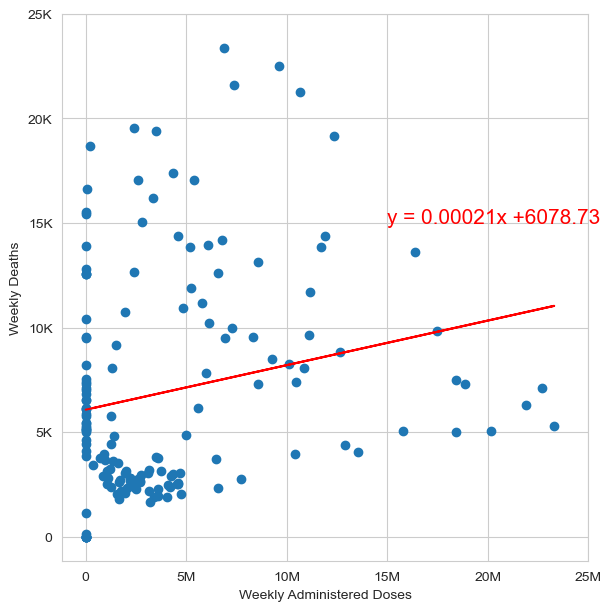

In [28]:
fig, ax = plt.subplots(figsize= (6,6),layout='constrained')
WeeklyCase_WeeklyDeath = linear_regression(Data1_Final_sorted_df['Weekly Administered Doses'],Data1_Final_sorted_df['Weekly Deaths'] )
plt.annotate(WeeklyCase_WeeklyDeath, (15000000, 15000), fontsize=15, color="red")
ax.set_xticks(np.arange(0, 30000000, 5000000), ['0', '5M', '10M','15M', '20M','25M'])
ax.set_yticks(np.arange(0, 30000, 5000), ['0', '5K', '10K','15K', '20K','25K'])
plt.ylabel('Weekly Deaths')
plt.xlabel('Weekly Administered Doses')
plt.savefig("output_data/Fig5.png")

I noticed that the Weekly Administered Doses is the independent variable (X-axis) while the weekly death (y) is the dependent variable 